# Deep Learning Lab Experiment- 3

# 1. Demonstrate the behavior of Gradient Descent and its variants—Batch Gradient Descent (GD), Stochastic Gradient Descent (SGD), and Mini-batch Stochastic Gradient Descent (Mini-batch SGD) on both simple and complex functions.

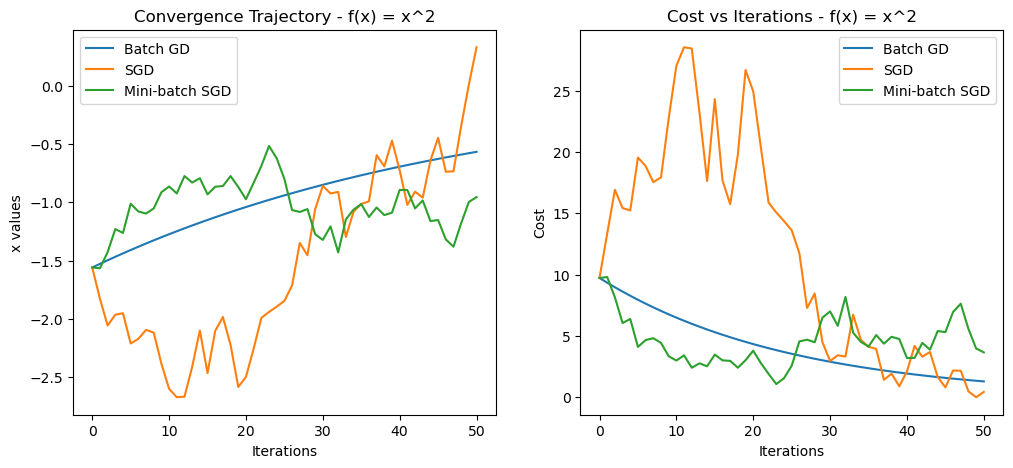

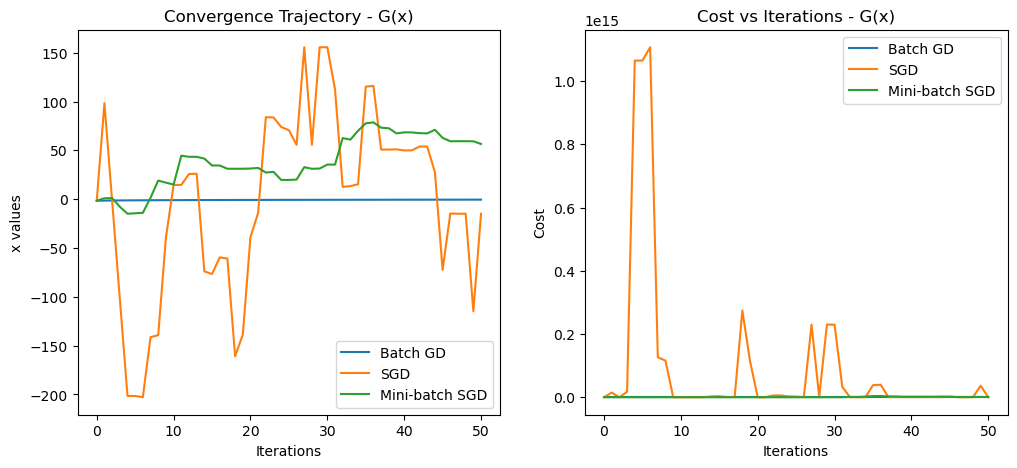

Final optimal values for f(x) = x^2:
Batch GD: -0.5678, SGD: 0.3290, Mini-batch SGD: -0.9558

Final optimal values for G(x) = x^4 + x^3 + x^2:
Batch GD: -0.4629, SGD: -14.8585, Mini-batch SGD: 56.5782


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions and their gradients
def f(x):
    return x**2

def df(x):
    return 2*x

def G(x):
    return x**4 + x**3 + x**2

def dG(x):
    return 4*x**3 + 3*x**2 + 2*x

# Gradient Descent Implementation with overflow handling
def gradient_descent(grad, x_init, lr=0.01, epochs=50, method='batch', batch_size=5, max_value=1e4):
    x = x_init
    trajectory = [x]
    cost = [grad(x)**2]
    
    for _ in range(epochs):
        if method == 'sgd':
            x_sample = np.random.uniform(-20, 20)  # Random sample for SGD
        elif method == 'mini-batch':
            x_sample = np.mean(np.random.uniform(-20, 20, batch_size))  # Random batch for Mini-batch
        else:
            x_sample = x  # Batch GD uses the full dataset
        
        gradient = grad(x_sample)

        # Prevent overflow by clamping gradient
        if abs(gradient) > max_value:
            gradient = np.sign(gradient) * max_value

        x -= lr * gradient

        # Prevent runaway values
        if abs(x) > max_value:
            print(f"Warning: Value exceeded {max_value}, stopping optimization.")
            break

        trajectory.append(x)
        cost.append(grad(x)**2)

    return x, trajectory, cost

# Initialize parameters
x_init = np.random.uniform(-20, 20)
learning_rate = 0.01
epochs = 50
batch_size = 5

# Run Batch Gradient Descent for f(x) and G(x)
x_final_batch_f, traj_batch_f, cost_batch_f = gradient_descent(df, x_init, learning_rate, epochs, method='batch')
x_final_batch_G, traj_batch_G, cost_batch_G = gradient_descent(dG, x_init, learning_rate, epochs, method='batch')

# Run Stochastic Gradient Descent (SGD)
x_final_sgd_f, traj_sgd_f, cost_sgd_f = gradient_descent(df, x_init, learning_rate, epochs, method='sgd')
x_final_sgd_G, traj_sgd_G, cost_sgd_G = gradient_descent(dG, x_init, learning_rate, epochs, method='sgd')

# Run Mini-batch Gradient Descent
x_final_mini_f, traj_mini_f, cost_mini_f = gradient_descent(df, x_init, learning_rate, epochs, method='mini-batch', batch_size=batch_size)
x_final_mini_G, traj_mini_G, cost_mini_G = gradient_descent(dG, x_init, learning_rate, epochs, method='mini-batch', batch_size=batch_size)

# Plot convergence trajectories for f(x) = x^2
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(traj_batch_f, label="Batch GD")
plt.plot(traj_sgd_f, label="SGD")
plt.plot(traj_mini_f, label="Mini-batch SGD")
plt.title("Convergence Trajectory - f(x) = x^2")
plt.xlabel("Iterations")
plt.ylabel("x values")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cost_batch_f, label="Batch GD")
plt.plot(cost_sgd_f, label="SGD")
plt.plot(cost_mini_f, label="Mini-batch SGD")
plt.title("Cost vs Iterations - f(x) = x^2")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

plt.show()

# Plot convergence trajectories for G(x)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(traj_batch_G, label="Batch GD")
plt.plot(traj_sgd_G, label="SGD")
plt.plot(traj_mini_G, label="Mini-batch SGD")
plt.title("Convergence Trajectory - G(x)")
plt.xlabel("Iterations")
plt.ylabel("x values")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cost_batch_G, label="Batch GD")
plt.plot(cost_sgd_G, label="SGD")
plt.plot(cost_mini_G, label="Mini-batch SGD")
plt.title("Cost vs Iterations - G(x)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

plt.show()

# Print final optimal values
print("Final optimal values for f(x) = x^2:")
print(f"Batch GD: {x_final_batch_f:.4f}, SGD: {x_final_sgd_f:.4f}, Mini-batch SGD: {x_final_mini_f:.4f}")

print("\nFinal optimal values for G(x) = x^4 + x^3 + x^2:")
print(f"Batch GD: {x_final_batch_G:.4f}, SGD: {x_final_sgd_G:.4f}, Mini-batch SGD: {x_final_mini_G:.4f}")


# 2. Consider this function also cos(pi.x) compute for x -4 to 4

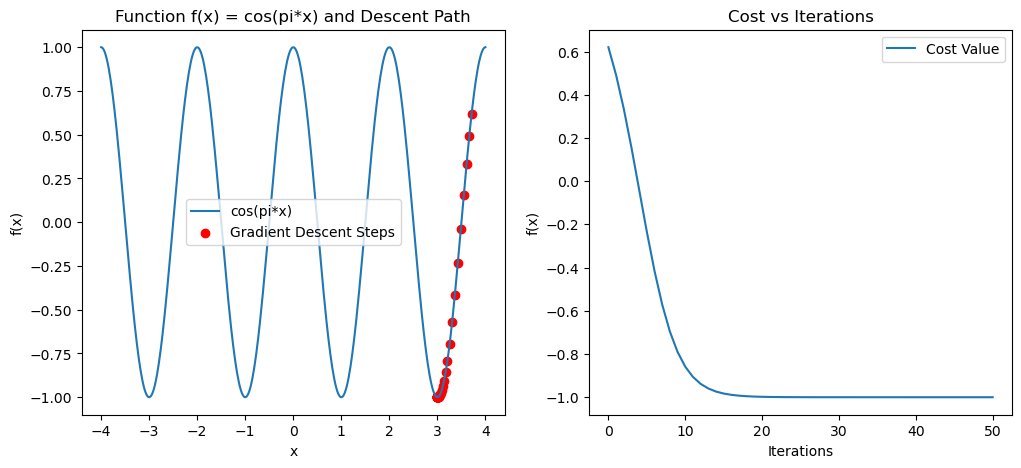

Initial x: 3.7129
Final optimized x: 3.0000
Final function value: -1.0000


In [3]:
# Given function and its derivative
def f(x):
    return np.cos(np.pi * x)

def df(x):
    return -2 * np.pi * np.sin(np.pi * x)

# Gradient Descent function
def gradient_descent(grad, x_init, lr=0.01, epochs=50):
    x = x_init
    trajectory = [x]
    cost = [f(x)]
    
    for _ in range(epochs):
        x -= lr * grad(x)
        trajectory.append(x)
        cost.append(f(x))
    
    return x, trajectory, cost

# Initial point and parameters
x_init = np.random.uniform(-4, 4)
learning_rate = 0.01
epochs = 50

# Perform gradient descent
x_final, x_trajectory, cost_trajectory = gradient_descent(df, x_init, learning_rate, epochs)

# Plot the results
x_vals = np.linspace(-4, 4, 400)
y_vals = f(x_vals)

plt.figure(figsize=(12, 5))

# Function plot
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, label="cos(pi*x)")
plt.scatter(x_trajectory, f(np.array(x_trajectory)), color='red', label="Gradient Descent Steps")
plt.title("Function f(x) = cos(pi*x) and Descent Path")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Cost plot
plt.subplot(1, 2, 2)
plt.plot(cost_trajectory, label="Cost Value")
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("f(x)")
plt.legend()

plt.show()

# Print final optimized x value
print(f"Initial x: {x_init:.4f}")
print(f"Final optimized x: {x_final:.4f}")
print(f"Final function value: {f(x_final):.4f}")


# 3. Develop and train a deep neural network to predict the onset of diabetes using the Pima Indians Diabetes dataset.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load dataset
data = pd.read_csv('diabetes.csv')

# Handle missing values and anomalies
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in columns_with_zeros:
    median = data[col].median()
    data[col] = data[col].replace(0, median)

# Handle class imbalance
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Apply feature engineering (scaling features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Summary of preprocessing
print("Data preprocessing complete!")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Data preprocessing complete!
Training set size: 800 samples
Test set size: 200 samples


Epoch 1/100


C:\Users\shubh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4907 - loss: 0.7101 - val_accuracy: 0.7000 - val_loss: 0.6274
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6713 - loss: 0.6269 - val_accuracy: 0.7200 - val_loss: 0.5625
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7274 - loss: 0.5677 - val_accuracy: 0.7550 - val_loss: 0.5254
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7290 - loss: 0.5526 - val_accuracy: 0.7350 - val_loss: 0.5059
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7466 - loss: 0.5164 - val_accuracy: 0.7400 - val_loss: 0.4954
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7411 - loss: 0.5163 - val_accuracy: 0.7400 - val_loss: 0.4901
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7301 - loss: 0.5148 - val_accuracy: 0.7550 - val_loss: 0.4865
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7557 - loss: 0.4934 - val_accuracy: 0.7600 - val_l

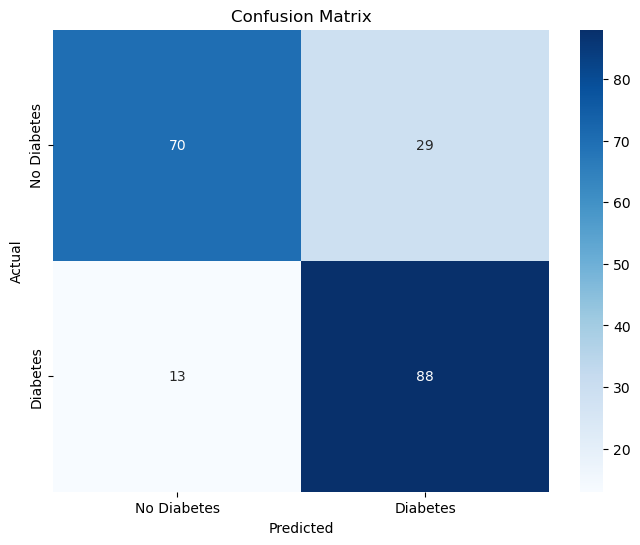

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


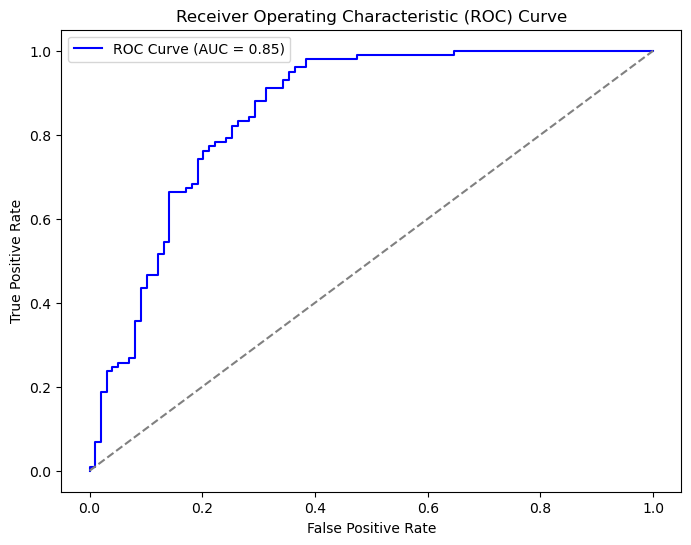

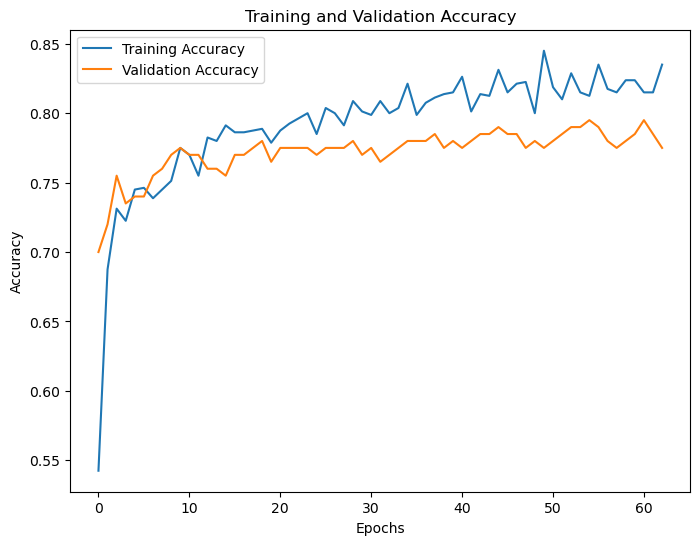

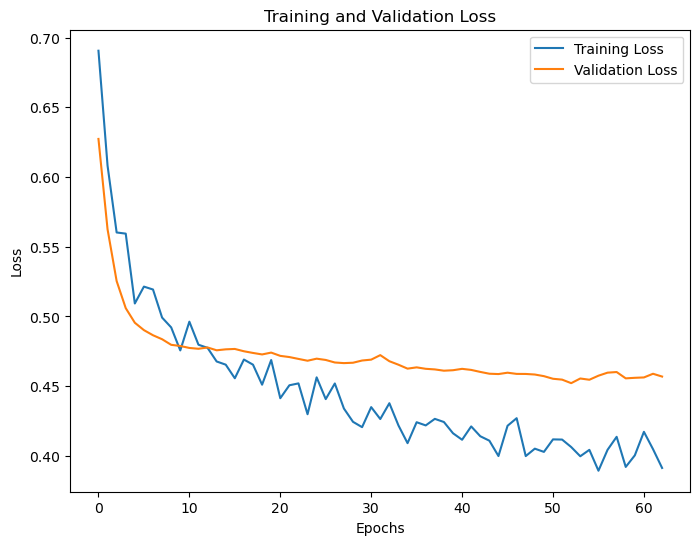

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
                             confusion_matrix, roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
data = pd.read_csv('diabetes.csv')

# Handle missing values and anomalies
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in columns_with_zeros:
    median = data[col].median()
    data[col] = data[col].replace(0, median)

# Handle class imbalance
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Apply feature engineering (scaling features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Build a Deep Neural Network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping], 
                    verbose=1)

# Evaluate the model
eval_results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {eval_results[0]:.4f}")
print(f"Test Accuracy: {eval_results[1]:.4f}")

# Generate classification metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], 
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

# Plot Training Curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
